In [ ]:
例如，△=0.5，表示基础资产变动0.01%，相应即期权价格变化0.5×0.01%。

①买入欧式看涨期权：△=N（d1）

②卖出欧式看涨期权：△=-N（d1）

③买入欧式看跌期权：△=N（d1）-1

④卖出欧式看跌期权：△=1-N（d1）

In [1]:

import numpy as np
def delta_option(S,K,V,sigma,r,T,op_type,longorshort):
    '''欧式期权的△值；
    S:基础资产的价格；    
    K：期权的执行价格；
    V:支付红利的现值；
    sigma:基础资产价格百分比变化的波动率；
    r:无风险收益率；
    T：期权合约的剩余期限；
    op_type:输入'call'表示看涨期权；输入'put'表示看跌期权；
    longorshort:输入'long'表示多头；输入'short'表示空头。'''
    import numpy as np
    from scipy.stats import norm
    d1=(np.log((S-V)/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    if op_type=='call':
        if longorshort=='long':
            delta=norm.cdf(d1)
        else:
            delta=-norm.cdf(d1)
    else:
        if longorshort=='long':
            delta=norm.cdf(d1)-1
        else:
            delta=1-norm.cdf(d1)
    return delta

In [2]:
S_list=np.linspace(10,30,100)
deltacalllong=delta_option(S=S_list,K=20,V=0,sigma=0.24,r=0.03,T=1,op_type='call',longorshort='long')
deltaputlong=delta_option(S=S_list,K=20,V=0,sigma=0.24,r=0.03,T=1,op_type='put',longorshort='long')
deltacallshort=delta_option(S=S_list,K=20,V=0,sigma=0.24,r=0.03,T=1,op_type='call',longorshort='short')
deltaputshort=delta_option(S=S_list,K=20,V=0,sigma=0.24,r=0.03,T=1,op_type='put',longorshort='short')

In [5]:
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32929 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31080 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26684 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-package

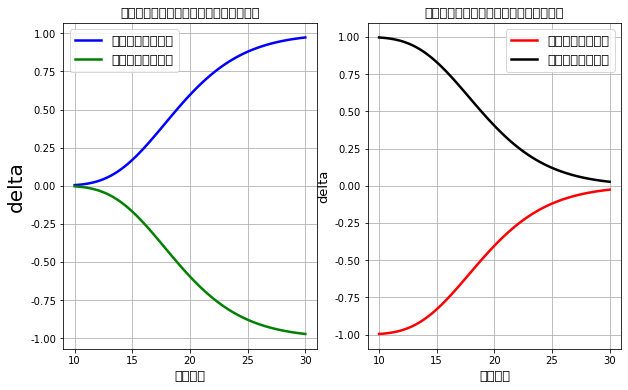

In [12]:

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(S_list,deltacalllong,'b-',label=u'买入欧式看涨期权',lw=2.5)
plt.plot(S_list,deltacallshort,'g-',label=u'卖出欧式看涨期权',lw=2.5)
#lw 线的粗细
plt.xlabel(u'股票价格',fontsize=13)
plt.ylabel(u'delta',fontsize=13) #字体大小
plt.title(u'股票价格变动与期权价格变动比率的关系',fontsize=13)
plt.legend(fontsize=13)
plt.grid('True')
plt.subplot(122)
plt.plot(S_list,deltaputlong,'r-',label=u'买入欧式看跌期权',lw=2.5)
plt.plot(S_list,deltaputshort,'k-',label=u'卖出欧式看跌期权',lw=2.5)
plt.xlabel(u'股票价格',fontsize=13)
plt.ylabel(u'delta',fontsize=13)
plt.title(u'股票价格变动与期权价格变动比率的关系',fontsize=13)
plt.legend(fontsize=13)
plt.grid('True')

In [ ]:
Gamma

Gamma反映标的价格变化一个单位时期权delta的变化，也就是期权价格对标的
价格的二阶导数。根据BS公式求二阶导可得欧式看涨和看跌期权的Gamma
表达式为：https://mp.weixin.qq.com/s/vH3TX7oIUp9UG40TicKDfw

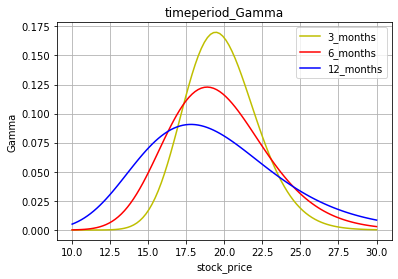

In [30]:

import numpy as np
from scipy.stats import norm
def gamma_option(S,K,V,sigma,r,T):
    d1 = (np.log((S-V)/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    return (np.exp(-d1**2/2))/(S*sigma*np.sqrt(2*np.pi*T))

#基础资产价格与期权gamma的关系
S_list=np.linspace(10,30,100)
gamma0=gamma_option(S=S_list,K=20,V=0,sigma=0.24,r=0.03,T=0.25)
gamma1=gamma_option(S=S_list,K=20,V=0,sigma=0.24,r=0.03,T=0.5)
gamma2=gamma_option(S=S_list,K=20,V=0,sigma=0.24,r=0.03,T=1)

plt.plot(S_list,gamma0,'y-',label='3_months')
plt.plot(S_list,gamma1,'r-',label='6_months')
plt.plot(S_list,gamma2,'b-',label='12_months')
plt.xlabel('stock_price')
plt.ylabel('Gamma')
plt.title('timeperiod_Gamma')
plt.grid('Ture')
plt.legend()
plt.show()



In [ ]:
return -(S*sigma*np.exp(-d1**2/2)/2*np.sqrt(2*np.pi*T))-r*K*np.exp(-r*T)*norm.cdf(d2)


<ipython-input-31-86e08cdd2f8e>:14: RuntimeWarning: divide by zero encountered in log
  d1=(np.log((S-V)/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32929 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 31080 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26684 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: 

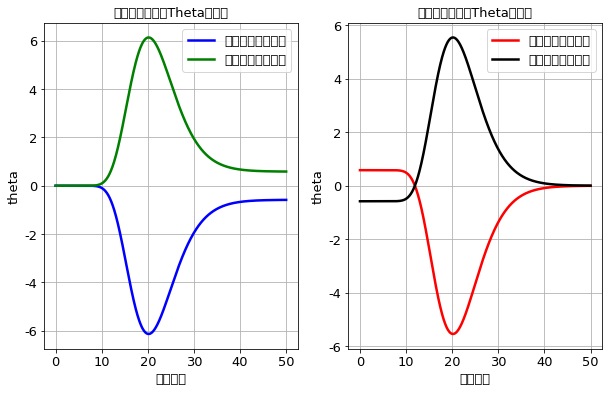

In [31]:

import numpy as np
def theta_option(S,K,V,sigma,r,T,op_type,longorshort):
    '''欧式期权的theta值；
    S:基础资产的价格；
    K：期权的执行价格；
    V:支付红利的现值；
    sigma:基础资产价格百分比变化的波动率；
    r:无风险收益率；
    T：期权合约的剩余期限；
    op_type:输入'call'表示看涨期权；输入'put'表示看跌期权；
    longorshort:输入'long'表示多头；输入'short'表示空头。'''
    import numpy as np
    from scipy.stats import norm
    d1=(np.log((S-V)/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    calltheta=-((S-V)*sigma*np.exp(-d1**2/2)/2*np.sqrt(2*np.pi*T))-r*K*np.exp(-r*T)*norm.cdf(d2)
    if op_type=='call':
        if longorshort=='long':
            theta=calltheta
        else:
            theta=-calltheta
    else:
        if longorshort=='long':
            theta=calltheta+r*K*np.exp(-r*T)
        else:
            theta=-(calltheta+r*K*np.exp(-r*T))
    return theta

import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
#基础资产价格与期权的到期期限的关系
S_list=np.linspace(0,50,1000)
thetacalllong=theta_option(S=S_list,K=20,V=0,sigma=0.24,r=0.03,T=1,op_type='call',longorshort='long')
thetaputlong=theta_option(S=S_list,K=20,V=0,sigma=0.24,r=0.03,T=1,op_type='put',longorshort='long')
thetacallshort=theta_option(S=S_list,K=20,V=0,sigma=0.24,r=0.03,T=1,op_type='call',longorshort='short')
thetaputshort=theta_option(S=S_list,K=20,V=0,sigma=0.24,r=0.03,T=1,op_type='put',longorshort='short')

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(S_list,thetacalllong,'b-',label=u'买入欧式看涨期权',lw=2.5)
plt.plot(S_list,thetacallshort,'g-',label=u'卖出欧式看涨期权',lw=2.5)
plt.xlabel(u'股票价格',fontsize=13)
plt.ylabel(u'theta',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'股票价格变动与Theta的关系',fontsize=13)
plt.legend(fontsize=13)
plt.grid('True')
plt.subplot(122)
plt.plot(S_list,thetaputlong,'r-',label=u'买入欧式看跌期权',lw=2.5)
plt.plot(S_list,thetaputshort,'k-',label=u'卖出欧式看跌期权',lw=2.5)
plt.xlabel(u'股票价格',fontsize=13)
plt.ylabel(u'theta',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'股票价格变动与Theta的关系',fontsize=13)
plt.legend(fontsize=13)
plt.grid('True')